In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data
players = pd.read_csv('pes_2020.csv')
players.head()

,name,shirt_number,team_name,league,nationality,region,height,weight,age,foot,...,com_playing_style_incisive_run,com_playing_style_early_cross,com_playing_style_long_ball_expert,com_playing_style_long_ranger,height_over_185,age_u_24,age_25_29,age_30_plus,ball_color,rating_stars
0,NEYMAR,10,PSG,Ligue 1 Conforama,BRAZIL,South America,175,68,27,Right foot,...,1,0,0,0,0,0,1,0,black,5
1,M. NEUER,1,FC BAYERN MÜNCHEN,Other European Leagues,GERMANY,Europe,193,92,33,Right foot,...,0,0,0,0,1,0,0,1,black,5
2,EDU CAMPABADAL,22,LUGO RB,Spanish 2nd Division,SPAIN,Europe,178,77,26,Right foot,...,0,0,0,0,0,0,1,0,white,1
3,FRAN CRUZ,5,EXTREMADURA AR,Spanish 2nd Division,SPAIN,Europe,184,73,28,Right foot,...,0,0,0,0,0,0,1,0,white,1
4,DANI PINILLOS,23,BARNSLEY R,English 2nd Division,SPAIN,Europe,183,74,27,Left foot,...,0,1,1,0,0,0,1,0,white,1


In [3]:
#select only columns that we think it is useful
x = ['name','team_name','league','nationality','height','weight','age','foot','registered_position',
    'offensive_awareness','defensive_awareness','ball_control','dribbling','finishing','heading',
     'speed','acceleration','overall_rating']
players = players[x]
players.head()

,name,team_name,league,nationality,height,weight,age,foot,registered_position,offensive_awareness,defensive_awareness,ball_control,dribbling,finishing,heading,speed,acceleration,overall_rating
0,NEYMAR,PSG,Ligue 1 Conforama,BRAZIL,175,68,27,Right foot,LWF,88,48,91,96,86,67,89,93,92
1,M. NEUER,FC BAYERN MÜNCHEN,Other European Leagues,GERMANY,193,92,33,Right foot,GK,43,60,68,57,41,70,61,56,89
2,EDU CAMPABADAL,LUGO RB,Spanish 2nd Division,SPAIN,178,77,26,Right foot,RB,62,69,71,63,52,70,72,74,68
3,FRAN CRUZ,EXTREMADURA AR,Spanish 2nd Division,SPAIN,184,73,28,Right foot,CB,51,71,62,60,51,71,67,65,66
4,DANI PINILLOS,BARNSLEY R,English 2nd Division,SPAIN,183,74,27,Left foot,LB,62,68,65,67,56,62,75,73,66


In [4]:
# high-level overview of data
print(players.shape)

(15035, 18)


In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15035 non-null  object
 1   team_name            15035 non-null  object
 2   league               15035 non-null  object
 3   nationality          15035 non-null  object
 4   height               15035 non-null  int64 
 5   weight               15035 non-null  int64 
 6   age                  15035 non-null  int64 
 7   foot                 15035 non-null  object
 8   registered_position  15035 non-null  object
 9   offensive_awareness  15035 non-null  int64 
 10  defensive_awareness  15035 non-null  int64 
 11  ball_control         15035 non-null  int64 
 12  dribbling            15035 non-null  int64 
 13  finishing            15035 non-null  int64 
 14  heading              15035 non-null  int64 
 15  speed                15035 non-null  int64 
 16  acce

>- No null values found

In [6]:
# descriptive statistics for numeric variables
players.describe()

,height,weight,age,offensive_awareness,defensive_awareness,ball_control,dribbling,finishing,heading,speed,acceleration,overall_rating
count,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,180.711407,74.534885,25.218557,62.826472,61.119255,67.503758,66.535617,59.963552,66.893449,72.358164,72.089458,68.489325
std,6.791057,6.799473,4.881732,10.273972,10.382518,8.069369,8.833469,10.401390,6.989765,6.892243,7.607273,6.660734
min,148.000000,45.000000,15.000000,40.000000,40.000000,41.000000,40.000000,40.000000,47.000000,47.000000,43.000000,50.000000
25%,175.000000,70.000000,21.000000,58.000000,52.000000,63.000000,62.000000,53.000000,61.000000,68.000000,67.000000,64.000000
50%,180.000000,74.000000,25.000000,64.000000,61.000000,68.000000,67.000000,60.000000,65.000000,73.000000,72.000000,68.000000
75%,185.000000,79.000000,29.000000,70.000000,69.000000,73.000000,72.000000,67.000000,71.000000,77.000000,77.000000,73.000000
max,207.000000,113.000000,43.000000,95.000000,95.000000,97.000000,96.000000,95.000000,94.000000,96.000000,97.000000,94.000000


In [7]:
#rename some columns for easy use
players.rename(columns={'registered_position':'position',
                       'offensive_awareness':'offensive',
                      'defensive_awareness':'defensive'},inplace=True)

In [8]:
players.head()

,name,team_name,league,nationality,height,weight,age,foot,position,offensive,defensive,ball_control,dribbling,finishing,heading,speed,acceleration,overall_rating
0,NEYMAR,PSG,Ligue 1 Conforama,BRAZIL,175,68,27,Right foot,LWF,88,48,91,96,86,67,89,93,92
1,M. NEUER,FC BAYERN MÜNCHEN,Other European Leagues,GERMANY,193,92,33,Right foot,GK,43,60,68,57,41,70,61,56,89
2,EDU CAMPABADAL,LUGO RB,Spanish 2nd Division,SPAIN,178,77,26,Right foot,RB,62,69,71,63,52,70,72,74,68
3,FRAN CRUZ,EXTREMADURA AR,Spanish 2nd Division,SPAIN,184,73,28,Right foot,CB,51,71,62,60,51,71,67,65,66
4,DANI PINILLOS,BARNSLEY R,English 2nd Division,SPAIN,183,74,27,Left foot,LB,62,68,65,67,56,62,75,73,66


### What is the structure of your dataset?

The data contains 15035 players with 18 features  
* 12 variables are numeric (height , weight , age , offensive , defensive , ball_control , dribbling , heading , speed , acceleration , overall_rating)
* 5 variables are categorical (name , team_name , league , nationality , foot , position)

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the overall rating of the players in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* I expect that finishing has the strongest effect of the player rating:the more accurate the player on the goal the higher overall rating.
* I think position will have weak relation with the rating.
* age should affect the rating.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: overall_rating.

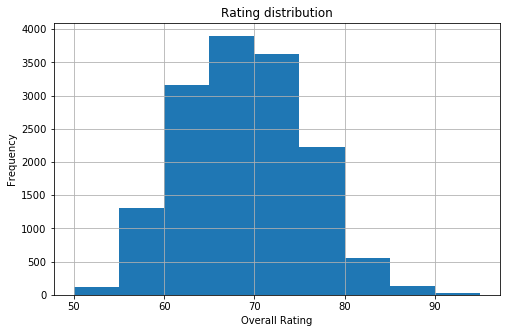

In [9]:
binsize = 5
bins = np.arange(players['overall_rating'].min(), players['overall_rating'].max()+binsize, binsize)
plt.figure(figsize=(8,5))
players.overall_rating.hist(bins=bins)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Rating distribution');

The rating distribution makes sense with one peak from 65 to 70 and most of the players are between 60 and 75 rating.

Next up, the first predictor variable of interest: __finishing__.

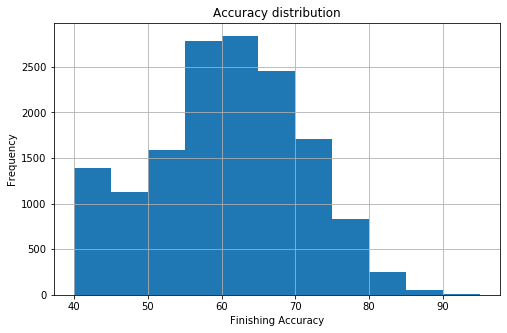

In [10]:
binsize = 5
bins = np.arange(players['finishing'].min(), players['finishing'].max()+binsize, binsize)
plt.figure(figsize=(8,5))
players.finishing.hist(bins=bins)
plt.xlabel('Finishing Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy distribution');

The chart has one peak on 60 and most of the players have accuracy between 55 and 70.

The minimum finishing accuracy is 40, and very low number of players are above 90.


lets see another variable:__age__ for example

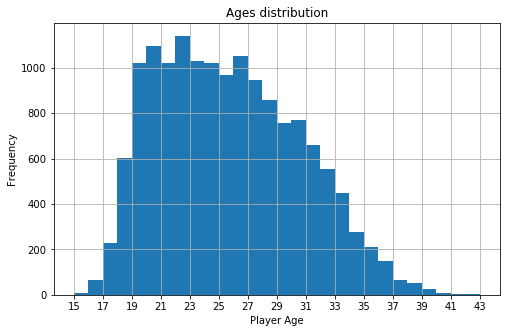

In [11]:
binsize = 1
bins = np.arange(players['age'].min(), players['age'].max()+binsize, binsize)
plt.figure(figsize=(8,5))
players.age.hist(bins=bins)
plt.xticks(np.arange(players['age'].min(), players['age'].max()+1,2))
plt.xlabel('Player Age')
plt.ylabel('Frequency')
plt.title('Ages distribution');

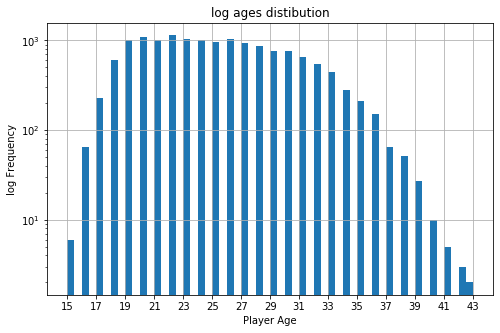

In [12]:
#use log scale to the right tail of the chart
binsize = 0.5
bins = np.arange(players['age'].min(), players['age'].max()+binsize, binsize)
plt.figure(figsize=(8,5))
players.age.hist(bins=bins,log=True)
plt.xticks(np.arange(players['age'].min(), players['age'].max()+1,2))
plt.xlabel('Player Age')
plt.ylabel('log Frequency')
plt.title('log ages distibution');

The maximun age found is 43 years old,
less than 10 players are 15 years old,
and the most repeated age is 22 years old.

lets move to the categorical variables:
__what are the most countries have players in the dataset?__

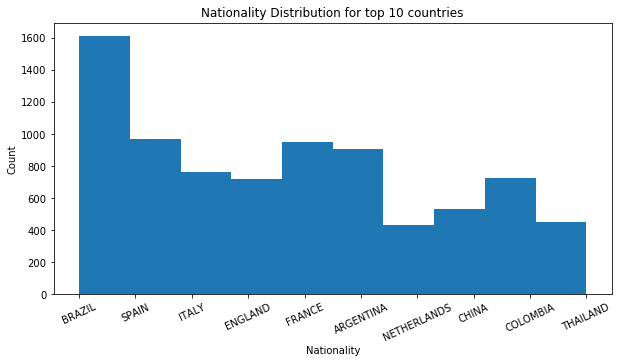

In [13]:
top_10_nations = players.nationality.value_counts().index[:10]
plt.figure(figsize=(10,5))
plt.hist(players.nationality[players.nationality.isin(top_10_nations)])
plt.xticks(rotation=25)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Nationality Distribution for top 10 countries');

Brazil have the highest number of players in the dataset with 1600 players,then Spain,France and Argentina with around 1000 players for each of them.

__what about leagues?__

c:\users\mlblbc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

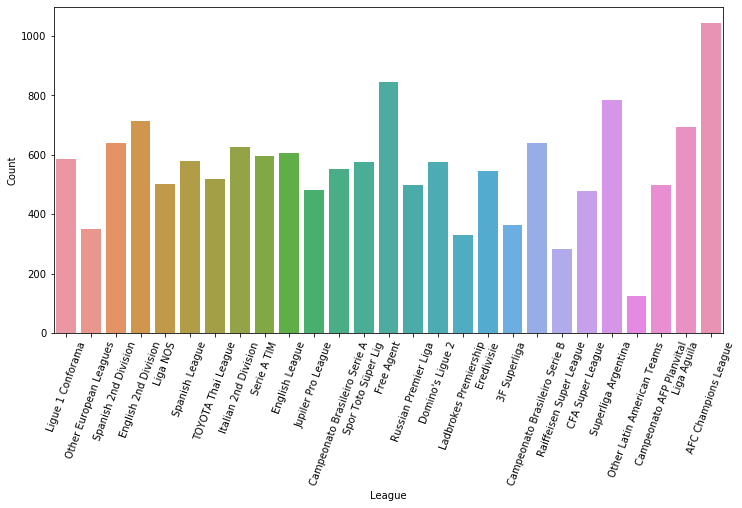

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(players.league)
plt.xticks(rotation=70)
plt.xlabel('League')
plt.ylabel('Count')

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [15]:
numeric_vars = ['height', 'weight', 'age', 'offensive', 'defensive', 'ball_control', 'dribbling','finishing','heading','speed','acceleration','overall_rating']
categoric_vars = ['team_name', 'league', 'nationality','foot','position']

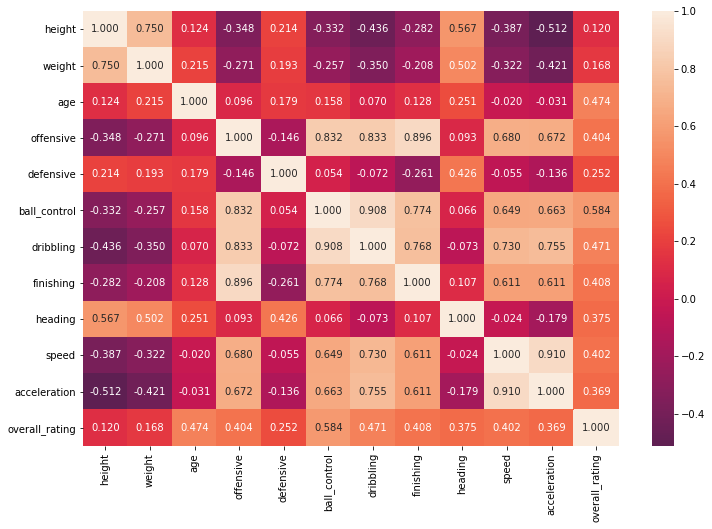

In [16]:
# correlation plot
plt.figure(figsize = [12, 8])
sns.heatmap(players[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'rocket', center = 0)

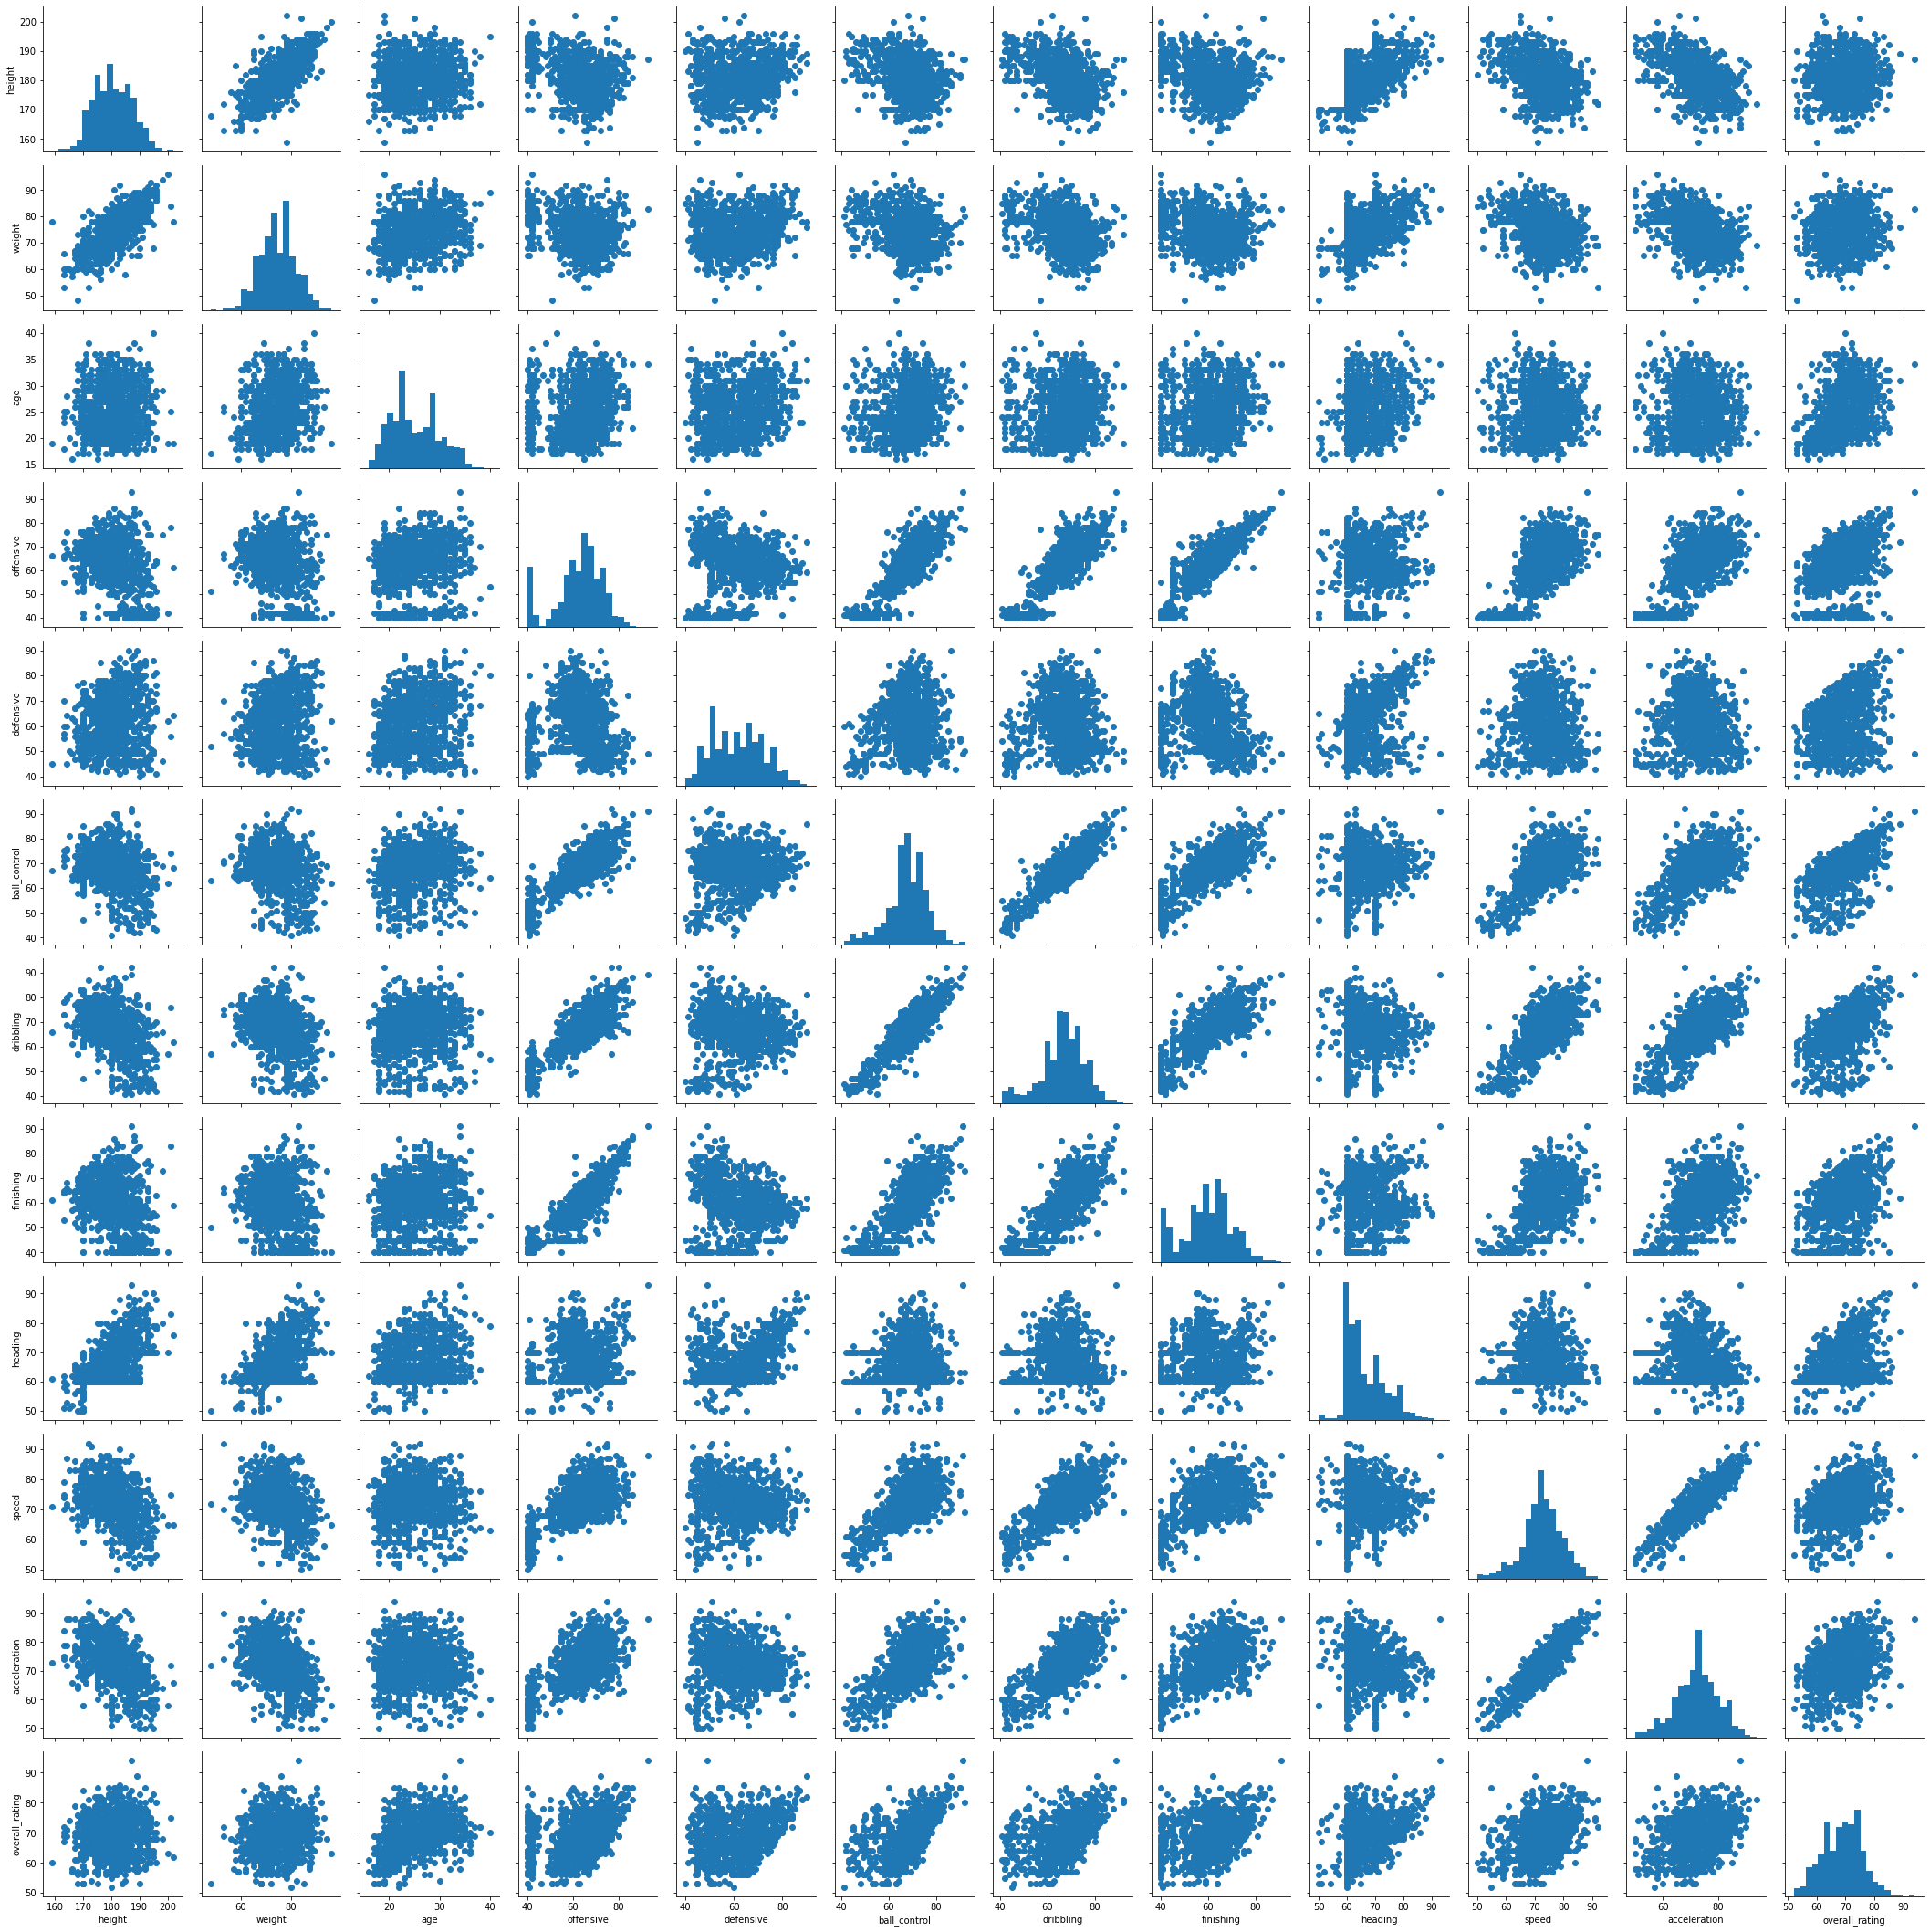

In [17]:
# plot matrix: sample 1000 players so that plots are clearer and
# they render faster
samples = np.random.choice(players.shape[0], 1000, replace = False)
players_samp = players.loc[samples,:]

g = sns.PairGrid(data = players_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

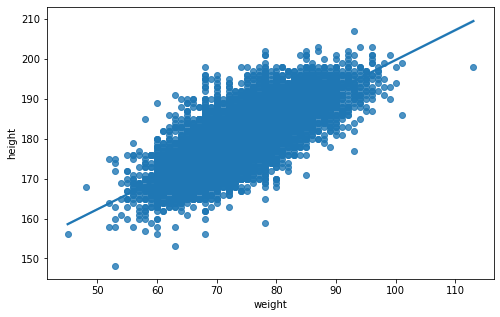

In [18]:
#lets see how height and weight are correlated
plt.figure(figsize=(8,5))
sns.regplot(data=players,x='weight',y='height')

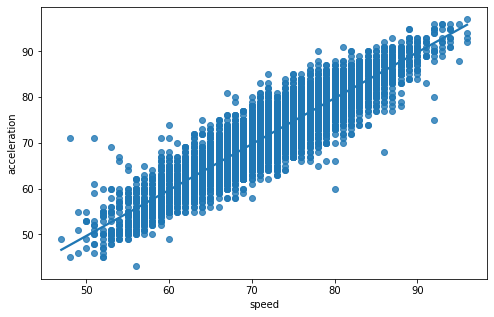

In [19]:
#speed and acceleration
plt.figure(figsize=(8,5))
sns.regplot(data=players,x='speed',y='acceleration')

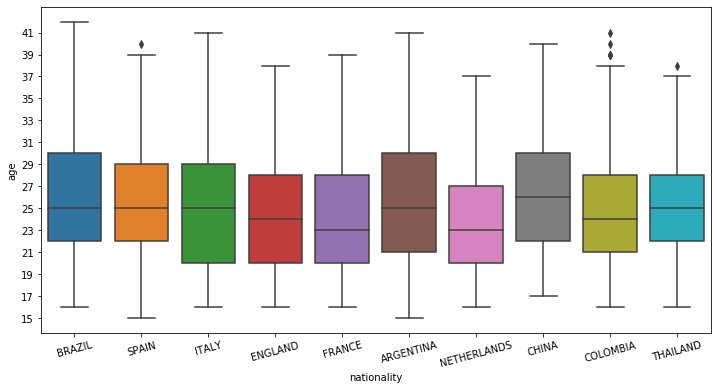

In [20]:
#lets see the age distribution for to 10 countries
plt.figure(figsize=(12,6))
top_10_countries = players[players.nationality.isin(top_10_nations)]
sns.boxplot(data=top_10_countries,x='nationality',y='age')
ages = np.arange(top_10_countries.age.min(),top_10_countries.age.max()+1,2)
plt.yticks(ages)
plt.xticks(rotation=15);

* France and Netharlands have the least median of age.
* Brazil and Argentina have the highest range of ages.
* 75% of all players are less than 30 years old.
* 50% of all players between 20 and 30 years old.

Text(0.5, 1.0, 'COUNT RIGHT AND LEFT FOOTED PLAYERS IN TOP 10 COUNTRIES')

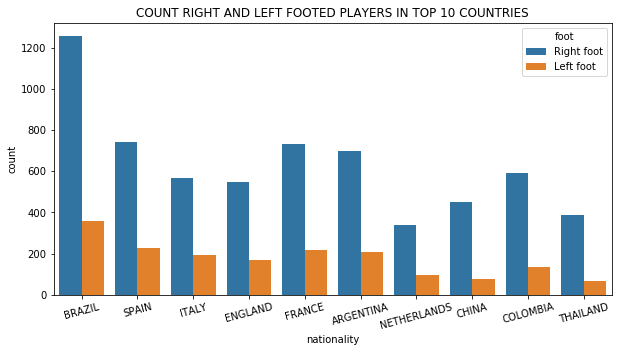

In [21]:
#nationality vs preffered foot
plt.figure(figsize=(10,5))
sns.countplot(data=top_10_countries,x='nationality',hue='foot')
plt.xticks(rotation=15)
plt.title('COUNT RIGHT AND LEFT FOOTED PLAYERS IN TOP 10 COUNTRIES')

Almost the same percentage observed for all countries

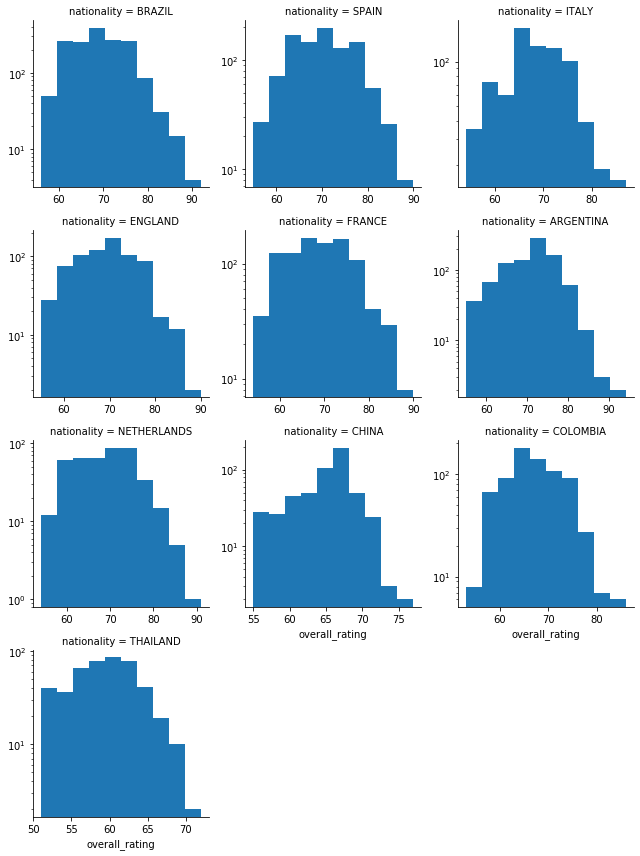

In [22]:
g = sns.FacetGrid(data=top_10_countries,col='nationality',col_wrap=3,sharex=False,sharey=False)
g.map(plt.hist,'overall_rating',log=True);

Text(0.5, 1.0, 'HEIGHT VS POSITION')

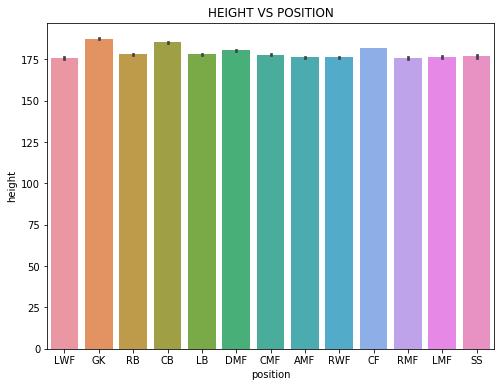

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=players,y='height',x='position')
plt.title('HEIGHT VS POSITION')

### Talk about some of the relationships you observed in this part of the investigation.

The overall rating is partly correlated with each numerical variable except height and weight.

As expected:
    * height and weight are highly correlated.
    * speed and acceleration are highly correlated.
    * ball_control,dribbling and finishing are highly correlated with each other.
    * offensive is correlated with all skills.
    * defensive is not correlated at all with any of other skills.
    * age is not correlated with anything.
   
* France and Netharlands have the least median of age.
* Brazil and Argentina have the highest range of ages.
* 75% of all players are less than 30 years old.
* 50% of all players between 20 and 30 years old.

* Left footed players almost the same percentage of all countries.
* High rated players in Brazil more than any other country.
* players from Europe,Brazil and Argentina have big chance to get high rate.
* GK,CB and CF are much higher than other positions


## Multivariate Exploration


c:\users\mlblbc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


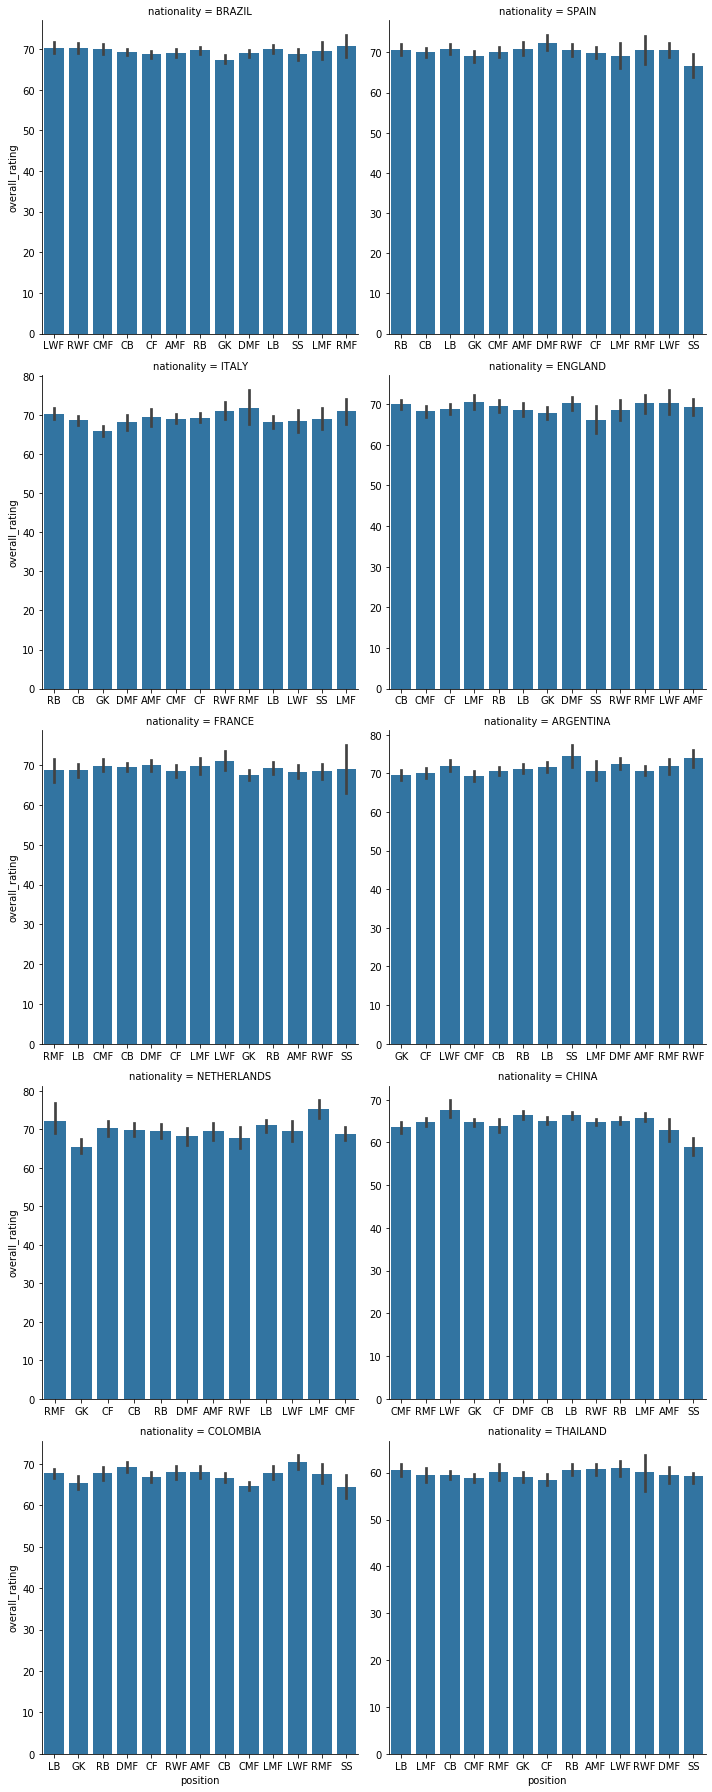

In [24]:
g = sns.FacetGrid(data=top_10_countries,col='nationality',
                  height=5,col_wrap=2,sharex=False,sharey=False)
g.map(sns.barplot,'position','overall_rating')

In [25]:
top_10_leagues = players.league.value_counts().index[:10]
top_10_leagues_df = players[players.league.isin(top_10_leagues)]

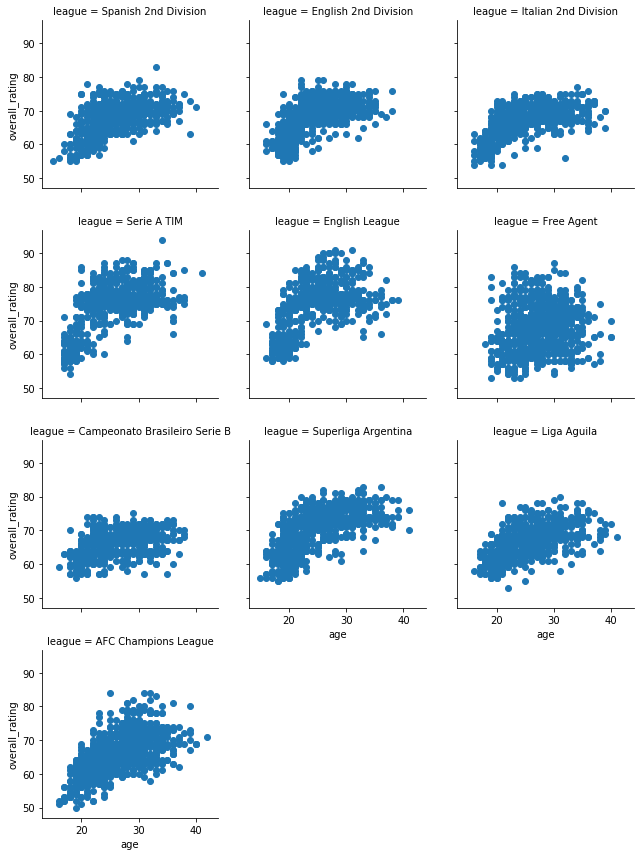

In [26]:
g = sns.FacetGrid(data=top_10_leagues_df,col= 'league',col_wrap=3)
g.map(plt.scatter,'age','overall_rating')

### Talk about some of the relationships you observed in this part of the investigation

* Left positions are higher rated than right positions.
* GK is the least position rating in most of countries.
* The second division leagues players are low rated.
* The English league has the best quality of players.
* All players in free Agent are around 30 years.